In [ ]:

#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d safiullah007/leaf-disease


 99% 1.23G/1.25G [00:19<00:00, 89.7MB/s]
100% 1.25G/1.25G [00:19<00:00, 68.1MB/s]


In [ ]:

# unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/leaf-disease.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

resize function

In [ ]:

def resizing_image(image_path,width,height):
  image = cv2.imread(image_path)
  resized_image = cv2.resize(image, (width, height))

  return resized_image


GrabCut method for segmentation

In [ ]:
def grabcut_segmentation(image, rect):
    """
    Perform GrabCut segmentation on an input image.

    Args:
        image (numpy.ndarray): The input image.
        rect (tuple): A rectangle (x, y, width, height) specifying the region of interest (ROI).

    Returns:
        numpy.ndarray: The segmented image.
    """
    # Create a mask for initialization (0 for background, 1 for foreground)
    mask = np.zeros(image.shape[:2], np.uint8)

    # Initialize the background and foreground models
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Apply GrabCut
    cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

    # Modify the mask to obtain the final result
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    # Multiply the image with the mask to get the segmented result
    segmented_image = image * mask2[:, :, np.newaxis]

    return segmented_image


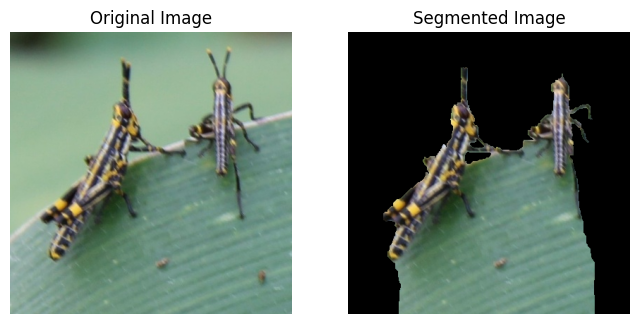

In [ ]:
image = cv2.imread('/content/CCMT Dataset/Maize/grasshoper/grasshoper103_.jpg')

# Define the region of interest (ROI) using a rectangle
roi_rect = (50, 50, 300, 400)  # Format: (x, y, width, height)

# Perform GrabCut segmentation
segmented_result = grabcut_segmentation(image, roi_rect)

# Display the original image and the segmented result
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(segmented_result, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image'), plt.axis('off')
plt.show()

Histogram of Oriented Gradients (HOG)

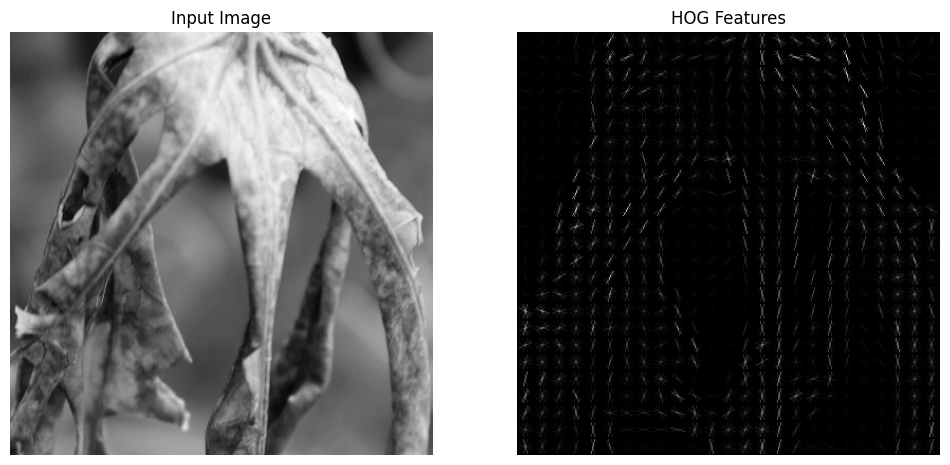

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.feature import hog
from skimage import exposure

# Load an example image (replace 'your_image.jpg' with the path to your image)
image = io.imread('/content/CCMT Dataset/Cassava/bacterial blight/bacterial blight1002_.jpg')

# Convert the image to grayscale
image_gray = color.rgb2gray(image)

# Compute HOG features
fd, hog_image = hog(image_gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)

# Rescale HOG features for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Plot the original image and HOG features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.imshow(image_gray, cmap=plt.cm.gray)
ax1.set_title('Input Image')
ax1.axis('off')

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG Features')
ax2.axis('off')

plt.show()


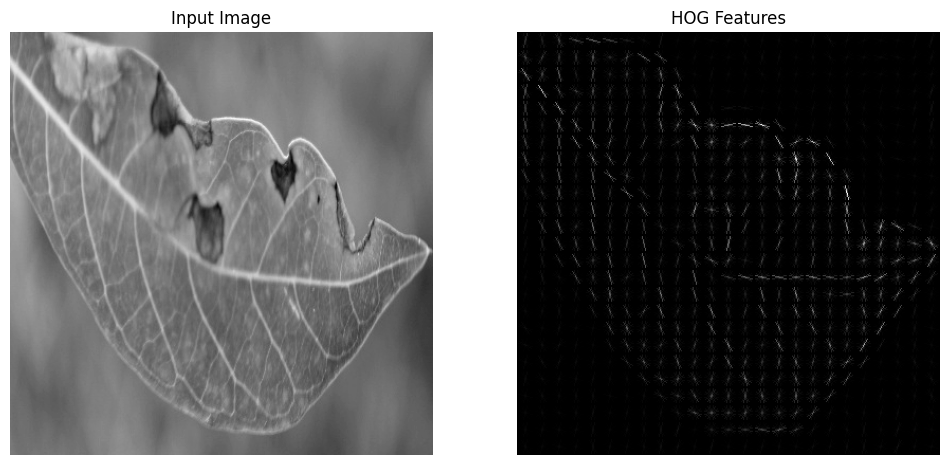

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.feature import hog
from skimage import exposure

# Load an example image (replace 'your_image.jpg' with the path to your image)
image = io.imread('/content/CCMT Dataset/Cassava/bacterial blight/bacterial blight1007_.jpg')

# Convert the image to grayscale
image_gray = color.rgb2gray(image)

# Compute HOG features
fd, hog_image = hog(image_gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)

# Rescale HOG features for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Plot the original image and HOG features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.imshow(image_gray, cmap=plt.cm.gray)
ax1.set_title('Input Image')
ax1.axis('off')

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG Features')
ax2.axis('off')

plt.show()

In [ ]:
def Compute_HOG(image):
  # image = cv2.imread('image_path')
  gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  fd, hog_image = hog(image_gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
  return hog_image_rescaled


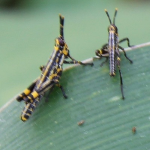

(-0.5, 399.5, 399.5, -0.5)

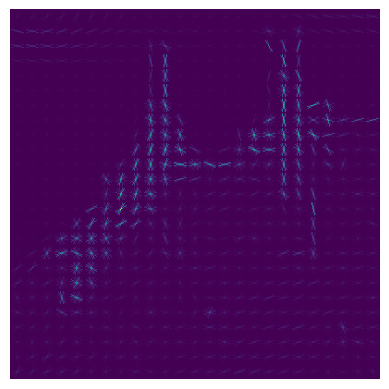

In [ ]:
image_path = '/content/CCMT Dataset/Maize/grasshoper/grasshoper103_.jpg'
image = resizing_image(image_path,150,150)
# image = cv2.imread(image_path)
cv2_imshow(image)
HOG_img = Compute_HOG(image)
# cv2_imshow(HOG_img) # hog image gula cv2_imshow function e kaj kore na
plt.imshow(HOG_img)
plt.axis('off')

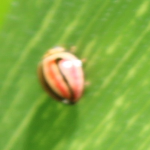

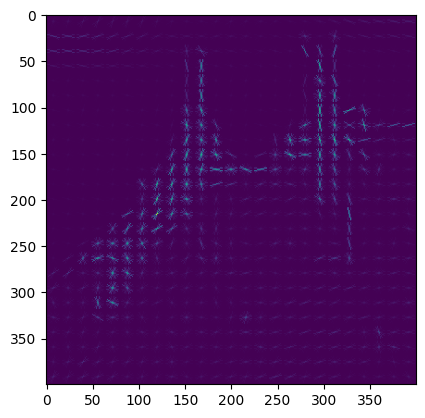

In [ ]:
image_path = '/content/CCMT Dataset/Maize/leaf beetle/leaf beetle106_.jpg'
image = resizing_image(image_path,150,150)
cv2_imshow(image)
HOG_img = Compute_HOG(image)
plt.imshow(HOG_img)

Scale-Invariant Feature Transform (SIFT):

In [ ]:

# Load an image
image = cv2.imread('/content/CCMT Dataset/Maize/leaf beetle/leaf beetle106_.jpg', cv2.IMREAD_GRAYSCALE)

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)

# Print the number of keypoints and the shape of descriptors
print("Number of Keypoints:", len(keypoints))
print("Shape of Descriptors:", descriptors.shape)

# Optionally, you can print the coordinates of each keypoint
for kp in keypoints:
    x, y = kp.pt
    size = kp.size
    angle = kp.angle
    response = kp.response
    octave = kp.octave
    print(f"Keypoint: x={x}, y={y}, size={size}, angle={angle}, response={response}, octave={octave}")

# To print the descriptors, you can simply print the 'descriptors' variable
print("Descriptors:")
print(descriptors)

Number of Keypoints: 52
Shape of Descriptors: (52, 128)
Keypoint: x=46.948089599609375, y=357.45220947265625, size=22.846317291259766, angle=202.14559936523438, response=0.01585903763771057, octave=131842
Keypoint: x=67.86033630371094, y=325.44793701171875, size=17.485126495361328, angle=204.06393432617188, response=0.018536321818828583, octave=14221570
Keypoint: x=98.93460083007812, y=100.93712615966797, size=16.791866302490234, angle=42.6317024230957, response=0.015037477016448975, octave=11272450
Keypoint: x=98.93460083007812, y=100.93712615966797, size=16.791866302490234, angle=213.82276916503906, response=0.015037477016448975, octave=11272450
Keypoint: x=100.58096313476562, y=141.50059509277344, size=24.116409301757812, angle=23.5247802734375, response=0.01890183985233307, octave=4064002
Keypoint: x=110.31822204589844, y=290.7784423828125, size=15.487222671508789, angle=208.71929931640625, response=0.014053674414753914, octave=5439746
Keypoint: x=115.84961700439453, y=257.19189453

Speeded-Up Robust Features (SURF):

In [ ]:
import cv2

# Load an image
image = cv2.imread('/content/CCMT Dataset/Maize/leaf beetle/leaf beetle106_.jpg', cv2.IMREAD_GRAYSCALE)

# Create a SURF object
surf = cv2.xfeatures2d.SURF_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = surf.detectAndCompute(image, None)

# Print the number of keypoints and the shape of descriptors
print("Number of Keypoints:", len(keypoints))
print("Shape of Descriptors:", descriptors.shape)

# Optionally, you can print the coordinates of each keypoint
for kp in keypoints:
    x, y = kp.pt
    size = kp.size
    angle = kp.angle
    response = kp.response
    octave = kp.octave
    print(f"Keypoint: x={x}, y={y}, size={size}, angle={angle}, response={response}, octave={octave}")

# To print the descriptors, you can simply print the 'descriptors' variable
print("Descriptors:")
print(descriptors)


error: ignored